# Cognitive Lab

This notebook goes the through the process of contructing and tuning a CNN (Convolutional Neural Network) to perform the task of image classification using the CIFAR-10 dataset.
The notebook will be split into several key sections, each tied to an imporatnt step in the process.

## Data Processing
In this step, we'll be downloading and processing the CIFAR-10 dataset.

In [ ]:
# Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Loading the CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Normalisation
train_images, test_images = train_images / 255, test_images / 255

In [ ]:
# Display a random image 
from random import randint
def displayRndImage():
    plt.imshow(train_images[randint(0, len(train_images))])
    plt.show()

displayRndImage()

## Model Construction
Build VGG16
Popular Model.

In [ ]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# Define function
def createModel(learningOpt = 'Adam', learningRate = 0.001):
    
    # Define Optimiser Mapping
    optDict = {
        'Adam' : Adam,
        'RMSProp': RMSprop,
        'SGD': SGD
    }
    
    # Define model
    mobilenet_model = MobileNet(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
    
    # Add Pooling and classification layer
    x = layers.GlobalAveragePooling2D()(mobilenet_model.output)
    x = layers.Dense(10, activation='softmax')(x)

    # Create the model
    model = models.Model(inputs=mobilenet_model.input, outputs=x)

    # Compile the model
    model.compile(optimizer = optDict[learningOpt](learning_rate=learningRate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
               
    return model

In [ ]:
# Summary of model
createModel().summary()

# Hyperparamter Tuning 
There are 3 hyper-parameters we'll be investigating, each with 3 different values under consideration.

* Learning Optimiser -> Adam, RMSProp, SGD
* Learning Rate -> 0.001, 0.01, 0.1
* Batch Size -> 32, 64, 128

In [ ]:
# Constants
# We'll be using a constant EPOCH value of 10. 
# This is due to computational/time constraints.
EPOCHS = 10

### Investigating the role of the learning Optimser

In [ ]:
# Fit Models
model_history_optimiser  = {
    optimiser: createModel(learningOpt = optimiser).fit(train_images, train_labels, epochs = EPOCHS, validation_data = (test_images, test_labels))
    for optimiser in ['Adam', 'RMSProp', 'SGD']
}

Raw Values
---------
Parameter: Adam
(0,0.5969399809837341)
(1,0.6600599884986877)
(2,0.6714000105857849)
(3,0.6515399813652039)
(4,0.7085199952125549)
(5,0.7020999789237976)
(6,0.7409999966621399)
(7,0.7854599952697754)
(8,0.7279599905014038)
(9,0.7581800222396851)
---------
Raw Values
---------
Parameter: RMSProp
(0,0.5687800049781799)
(1,0.6708999872207642)
(2,0.7234399914741516)
(3,0.760200023651123)
(4,0.7884799838066101)
(5,0.8075399994850159)
(6,0.8264399766921997)
(7,0.8374800086021423)
(8,0.8505799770355225)
(9,0.8554400205612183)
---------
Raw Values
---------
Parameter: SGD
(0,0.4151400029659271)
(1,0.5691999793052673)
(2,0.6298199892044067)
(3,0.6667199730873108)
(4,0.6888999938964844)
(5,0.7061799764633179)
(6,0.7246599793434143)
(7,0.7371000051498413)
(8,0.7494199872016907)
(9,0.7603800296783447)
---------


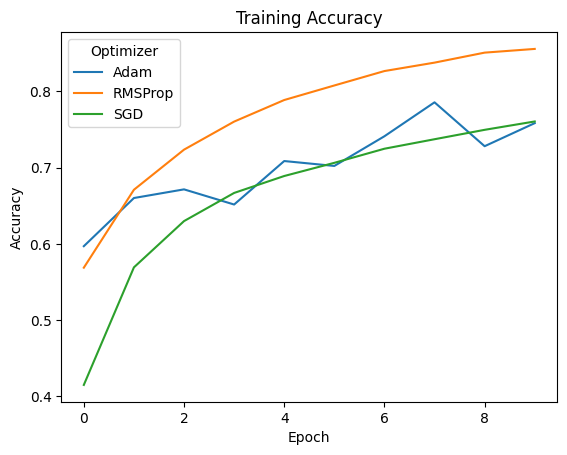

In [40]:
# Plot training accuracy over epochs for all three models
for param, history in model_history_optimiser.items():
    plt.plot(history.history['accuracy'], label=str(param))

    print("Raw Values")
    print("---------")
    print(f"Parameter: {param}")
    for i, value in enumerate(history.history['accuracy']):
        print(f"({i},{value})")
    print("---------")
    
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(title="Optimizer")
plt.show()

Raw Values
---------
Parameter: Adam
(0,0.6305000185966492)
(1,0.6973000168800354)
(2,0.5879999995231628)
(3,0.7282000184059143)
(4,0.6776999831199646)
(5,0.6599000096321106)
(6,0.7487000226974487)
(7,0.7466999888420105)
(8,0.7390000224113464)
(9,0.770799994468689)
---------
Raw Values
---------
Parameter: RMSProp
(0,0.675599992275238)
(1,0.7064999938011169)
(2,0.7414000034332275)
(3,0.7193999886512756)
(4,0.748199999332428)
(5,0.7616999745368958)
(6,0.7595000267028809)
(7,0.7822999954223633)
(8,0.751800000667572)
(9,0.76419997215271)
---------
Raw Values
---------
Parameter: SGD
(0,0.54830002784729)
(1,0.6219000220298767)
(2,0.6638000011444092)
(3,0.6852999925613403)
(4,0.7085999846458435)
(5,0.7225000262260437)
(6,0.7243000268936157)
(7,0.7376000285148621)
(8,0.7336000204086304)
(9,0.7448999881744385)
---------


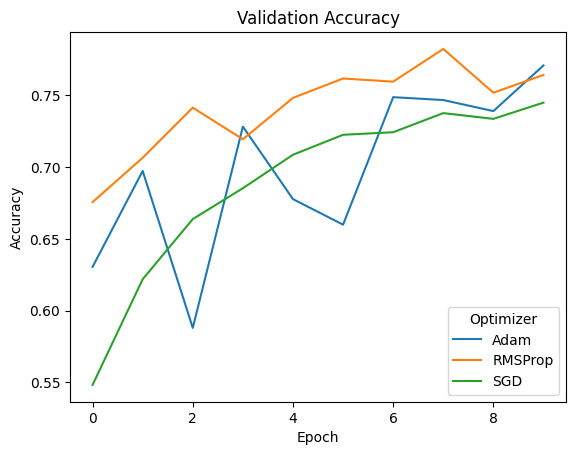

In [41]:
# Plot Validation accuracy over epochs for all three models
for param, history in model_history_optimiser.items():
    plt.plot(history.history['val_accuracy'], label=str(param))

    print("Raw Values")
    print("---------")
    print(f"Parameter: {param}")
    for i, value in enumerate(history.history['val_accuracy']):
        print(f"({i},{value})")
    print("---------")
    
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(title="Optimizer")
plt.show()

## Investigating the role of the Learning Rate

In [ ]:
# Define and Fit Models
model_history_learning_rate  = {
    lr: createModel(learningRate=lr).fit(train_images, train_labels, epochs = EPOCHS, validation_data = (test_images, test_labels))
    for lr in [0.001, 0.01, 0.1]
}

Raw Values
---------
Parameter: 0.001
(0,0.5899400115013123)
(1,0.6218000054359436)
(2,0.6002799868583679)
(3,0.6235399842262268)
(4,0.6539000272750854)
(5,0.671999990940094)
(6,0.7021600008010864)
(7,0.7054600119590759)
(8,0.7276999950408936)
(9,0.7390400171279907)
---------
Raw Values
---------
Parameter: 0.01
(0,0.1708800047636032)
(1,0.1741199940443039)
(2,0.263480007648468)
(3,0.295960009098053)
(4,0.3447999954223633)
(5,0.38152000308036804)
(6,0.42274001240730286)
(7,0.44477999210357666)
(8,0.4475800096988678)
(9,0.3991599977016449)
---------
Raw Values
---------
Parameter: 0.1
(0,0.14324000477790833)
(1,0.18741999566555023)
(2,0.21478000283241272)
(3,0.22759999334812164)
(4,0.1600400060415268)
(5,0.181659996509552)
(6,0.13165999948978424)
(7,0.09954000264406204)
(8,0.09989999979734421)
(9,0.10072000324726105)
---------


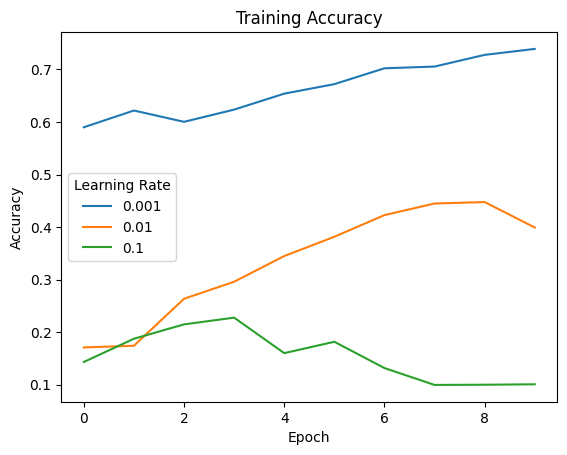

In [42]:
# Plot training accuracy over epochs for all three models
for param, history in model_history_learning_rate.items():
    plt.plot(history.history['accuracy'], label=str(param))

    print("Raw Values")
    print("---------")
    print(f"Parameter: {param}")
    for i, value in enumerate(history.history['accuracy']):
        print(f"({i},{value})")
    print("---------")
    
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(title="Learning Rate")
plt.show()

Raw Values
---------
Parameter: 0.001
(0,0.5710999965667725)
(1,0.5796999931335449)
(2,0.542900025844574)
(3,0.4763999879360199)
(4,0.580299973487854)
(5,0.7146000266075134)
(6,0.734499990940094)
(7,0.7350000143051147)
(8,0.7199000120162964)
(9,0.5877000093460083)
---------
Raw Values
---------
Parameter: 0.01
(0,0.1696999967098236)
(1,0.23649999499320984)
(2,0.10029999911785126)
(3,0.2443999946117401)
(4,0.299699991941452)
(5,0.301800012588501)
(6,0.181099995970726)
(7,0.29840001463890076)
(8,0.2687999904155731)
(9,0.34540000557899475)
---------
Raw Values
---------
Parameter: 0.1
(0,0.1834000051021576)
(1,0.20029999315738678)
(2,0.1906999945640564)
(3,0.2012999951839447)
(4,0.10000000149011612)
(5,0.10000000149011612)
(6,0.10000000149011612)
(7,0.10000000149011612)
(8,0.10000000149011612)
(9,0.10000000149011612)
---------


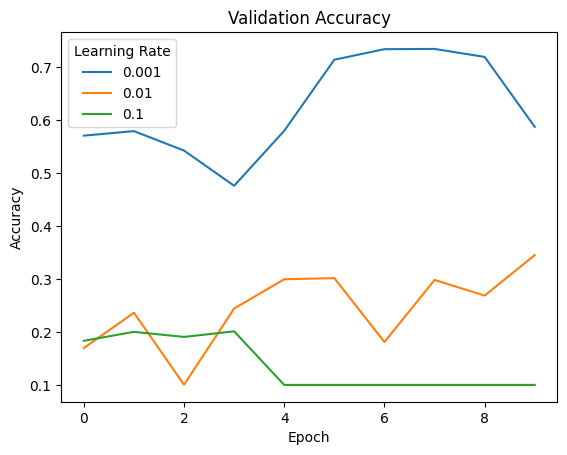

In [43]:
# Plot validation accuracy over epochs for all three models
for param, history in model_history_learning_rate.items():
    plt.plot(history.history['val_accuracy'], label=str(param))

    print("Raw Values")
    print("---------")
    print(f"Parameter: {param}")
    for i, value in enumerate(history.history['val_accuracy']):
        print(f"({i},{value})")
    print("---------")
    
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(title="Learning Rate")
plt.show()

## Investigating the role of the batch size

In [ ]:
# Define and Fit Models
model_history_batch_size  = {
    batch: createModel().fit(train_images, train_labels, epochs = EPOCHS, validation_data = (test_images, test_labels), batch_size= batch)
    for batch in [32, 64, 128]
}

Raw Values
---------
Parameter: 32
(0,0.5960000157356262)
(1,0.702239990234375)
(2,0.6567000150680542)
(3,0.6806399822235107)
(4,0.6986600160598755)
(5,0.7234799861907959)
(6,0.7667800188064575)
(7,0.758400022983551)
(8,0.7843199968338013)
(9,0.7789599895477295)
---------
Raw Values
---------
Parameter: 64
(0,0.6293200254440308)
(1,0.7382400035858154)
(2,0.7723600268363953)
(3,0.7836999893188477)
(4,0.8253999948501587)
(5,0.8334400057792664)
(6,0.8486599922180176)
(7,0.8622000217437744)
(8,0.8119999766349792)
(9,0.8634999990463257)
---------
Raw Values
---------
Parameter: 128
(0,0.6531999707221985)
(1,0.781220018863678)
(2,0.8257399797439575)
(3,0.8537399768829346)
(4,0.874180018901825)
(5,0.8844000101089478)
(6,0.9010999798774719)
(7,0.9140999913215637)
(8,0.9233400225639343)
(9,0.9298999905586243)
---------


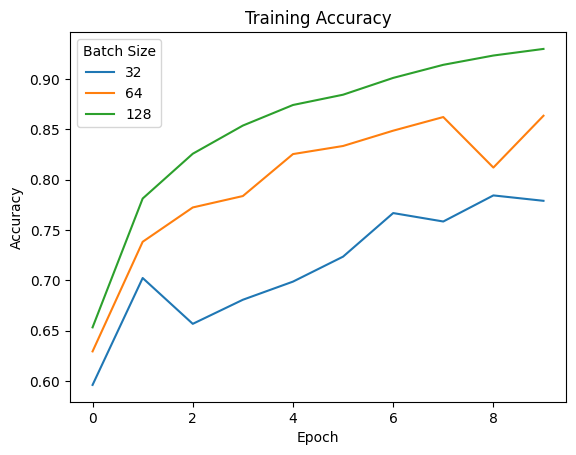

In [44]:
# Plot training accuracy over epochs for all three models
for param, history in model_history_batch_size.items():
    plt.plot(history.history['accuracy'], label=str(param))

    print("Raw Values")
    print("---------")
    print(f"Parameter: {param}")
    for i, value in enumerate(history.history['accuracy']):
        print(f"({i},{value})")
    print("---------")
    
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(title="Batch Size")
plt.show()

Raw Values
---------
Parameter: 32
(0,0.6679999828338623)
(1,0.7200999855995178)
(2,0.644599974155426)
(3,0.6549999713897705)
(4,0.7186999917030334)
(5,0.7311000227928162)
(6,0.7069000005722046)
(7,0.771399974822998)
(8,0.7534000277519226)
(9,0.7128000259399414)
---------
Raw Values
---------
Parameter: 64
(0,0.677299976348877)
(1,0.7577999830245972)
(2,0.6779999732971191)
(3,0.7800999879837036)
(4,0.7085000276565552)
(5,0.8051000237464905)
(6,0.8033999800682068)
(7,0.7994999885559082)
(8,0.7918000221252441)
(9,0.8021000027656555)
---------
Raw Values
---------
Parameter: 128
(0,0.7210000157356262)
(1,0.7663999795913696)
(2,0.7815999984741211)
(3,0.7853000164031982)
(4,0.7685999870300293)
(5,0.7932000160217285)
(6,0.8131999969482422)
(7,0.7958999872207642)
(8,0.8087000250816345)
(9,0.7840999960899353)
---------


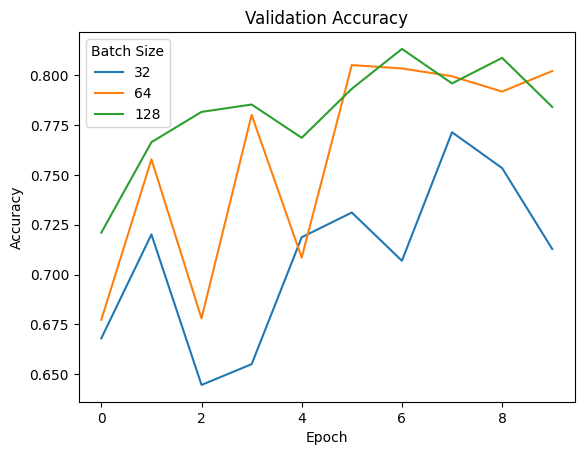

In [45]:
# Plot validation accuracy over epochs for all three models
for param, history in model_history_batch_size.items():
    plt.plot(history.history['val_accuracy'], label=str(param))

    print("Raw Values")
    print("---------")
    print(f"Parameter: {param}")
    for i, value in enumerate(history.history['val_accuracy']):
        print(f"({i},{value})")
    print("---------")
    
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(title="Batch Size")
plt.show()